In [ ]:
PROJECT - COVID 19 TREND ANALYSIS

Given the data about covid 19 patients write code to visualize the impact and analyze the trend of the rate of infection and recovery as well as make predictions.
The predictions will be made about the number of cases expected in a week in future based on the current trends

GUIDELINES:

1. Use pandas to accomodate data from multiple data file
2. Use plotly (visualization library) to create interactive visualizations
3. Use Facebooks prophet library to make time series models
4. Visualize the prediction by combining these technologies

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("covid_19.csv")
data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
data.describe(include='all')

Province/State Country/Region           Lat  \
count                          14664          49068  49068.000000   
unique                            78            187           NaN   
top     Australian Capital Territory          China           NaN   
freq                             188           6204           NaN   
mean                             NaN            NaN     21.433730   
std                              NaN            NaN     24.950320   
min                              NaN            NaN    -51.796300   
25%                              NaN            NaN      7.873054   
50%                              NaN            NaN     23.634500   
75%                              NaN            NaN     41.204380   
max                              NaN            NaN     71.706900   

                Long        Date     Confirmed         Deaths     Recovered  \
count   49068.000000       49068  4.906800e+04   49068.000000  4.906800e+04   
unique           NaN         188           NaN            NaN           NaN   
top              NaN  2020-01-22           NaN            NaN           NaN   
freq             NaN         261           NaN            NaN           NaN   
mean       23.528236         NaN  1.688490e+04     884.179160  7.915713e+03   
std        70.442740         NaN  1.273002e+05    6313.584411  5.480092e+04   
min      -135.000000         NaN  0.000000e+00       0.000000  0.000000e+00   
25%       -15.310100         NaN  4.000000e+00       0.000000  0.000000e+00   
50%        21.745300         NaN  1.680000e+02       2.000000  2.900000e+01   
75%        80.771797         NaN  1.518250e+03      30.000000  6.660000e+02   
max       178.065000         NaN  4.290259e+06  148011.000000  1.846641e+06   

              Active WHO Region  
count   4.906800e+04      49068  
unique           NaN          6  
top              NaN     Europe  
freq             NaN      15040  
mean    8.085012e+03        NaN  
std     7.625890e+04        NaN  
min    -1.400000e+01        NaN  
25%     0.000000e+00        NaN  
50%     2.600000e+01        NaN  
75%     6.060000e+02        NaN  
max     2.816444e+06        NaN

In [6]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [9]:
data.rename(columns ={'Province/State': 'State','Country/Region':'Country'}, inplace = True)

In [10]:
data.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [11]:
data.head(5)

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [12]:
#cases on the last day
top = data[data['Date']== data['Date'].max()]

In [13]:
top

State                Country        Lat       Long        Date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [15]:
top.shape

(261, 10)

In [18]:
top['Date'].nunique()

1

In [23]:
c = top.groupby('Country')['Confirmed','Deaths','Recovered','Active'].value_counts().reset_index()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [37]:
gp = data.groupby('Country')[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()

In [38]:
gp

Country  Confirmed   Active  Recovered  Deaths
0           Afghanistan    1936390  1089052     798240   49098
1               Albania     196702    72117     118877    5708
2               Algeria    1179755   345886     755897   77972
3               Andorra      94404    19907      69074    5423
4                Angola      22662    15011       6573    1078
..                  ...        ...      ...        ...     ...
182  West Bank and Gaza     233461   170967      61124    1370
183      Western Sahara        901      190        648      63
184               Yemen      67180    25694      23779   17707
185              Zambia     129421    43167      83611    2643
186            Zimbabwe      50794    37706      12207     881

[187 rows x 5 columns]

In [40]:
import plotly.express as px
import matplotlib.pyplot as plt

In [41]:
#world map --> Deaths
x = px.choropleth(gp,locations= 'Country', locationmode = 'country names', color = 'Deaths',
                 hover_name = 'Country', range_color = [1,40000], color_continuous_scale='Peach',
                 title = 'Deaths case country wise')
x.show()

In [43]:
x = px.choropleth(gp,locations= 'Country', locationmode = 'country names', color = 'Deaths',
                 hover_name = 'Country', range_color = [1,50000], color_continuous_scale='Viridis',
                 title = 'Deaths case country wise')
x.show()

In [50]:
x_active = px.choropleth(gp,locations= 'Country', locationmode = 'country names', color = 'Active',
                 hover_name = 'Country', range_color = [1,50000], color_continuous_scale='Viridis',
                 title = 'Active case country wise')
x_active.show()

In [51]:
x = px.choropleth(gp,locations= 'Country', locationmode = 'country names', color = 'Confirmed',
                 hover_name = 'Country', range_color = [1,50000], color_continuous_scale='Viridis',
                 title = 'Confirmed case country wise')
x.show()

In [52]:
x = px.choropleth(gp,locations= 'Country', locationmode = 'country names', color = 'Recovered',
                 hover_name = 'Country', range_color = [1,50000], color_continuous_scale='Viridis',
                 title = 'Recovered case country wise')
x.show()

In [44]:
data.head(5)

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.1+ MB


In [46]:
data['Date'] = pd.to_datetime(data['Date'])
#YYYY-MM-DD
data['Date'] = data['Date'].dt.date

In [47]:
data['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: Date, Length: 49068, dtype: object

In [54]:
data.head()

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [55]:
# animation_frame  = 'Date'
x = px.choropleth(data,locations= 'Country', 
                  locationmode = 'country names', 
                  color = 'Deaths',
                 hover_name = 'Country', 
                  animation_frame  = 'Date',
                  range_color = [1,50000], 
                  color_continuous_scale='Viridis',
                 title = 'Deaths case country wise')
x.show()

In [56]:
t_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
t_cases

Date  Confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

In [57]:
t_cases_active = data.groupby('Date')['Active'].sum().reset_index()
t_cases_active

Date   Active
0    2020-01-22      510
1    2020-01-23      606
2    2020-01-24      879
3    2020-01-25     1353
4    2020-01-26     2010
..          ...      ...
183  2020-07-23  6166006
184  2020-07-24  6212290
185  2020-07-25  6243930
186  2020-07-26  6309711
187  2020-07-27  6358362

[188 rows x 2 columns]

In [59]:
t_cases_death = data.groupby('Date')['Deaths'].sum().reset_index()
t_cases_death

Date  Deaths
0    2020-01-22      17
1    2020-01-23      18
2    2020-01-24      26
3    2020-01-25      42
4    2020-01-26      56
..          ...     ...
183  2020-07-23  633506
184  2020-07-24  639650
185  2020-07-25  644517
186  2020-07-26  648621
187  2020-07-27  654036

[188 rows x 2 columns]

In [73]:
t_cases_recovery = data.groupby('Date')['Recovered'].sum().reset_index()
t_cases_recovery

Date  Recovered
0    2020-01-22         28
1    2020-01-23         30
2    2020-01-24         36
3    2020-01-25         39
4    2020-01-26         52
..          ...        ...
183  2020-07-23    8710969
184  2020-07-24    8939705
185  2020-07-25    9158743
186  2020-07-26    9293464
187  2020-07-27    9468087

[188 rows x 2 columns]

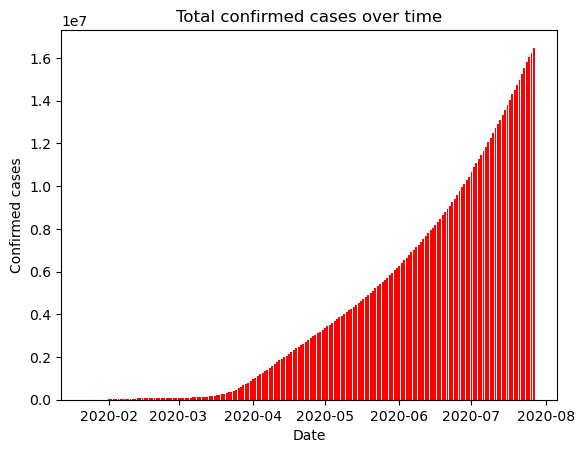

In [58]:
#plot date vs confirmed cases using barplot 
plt.bar(t_cases['Date'],t_cases['Confirmed'], color = 'red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('Total confirmed cases over time')
plt.show()

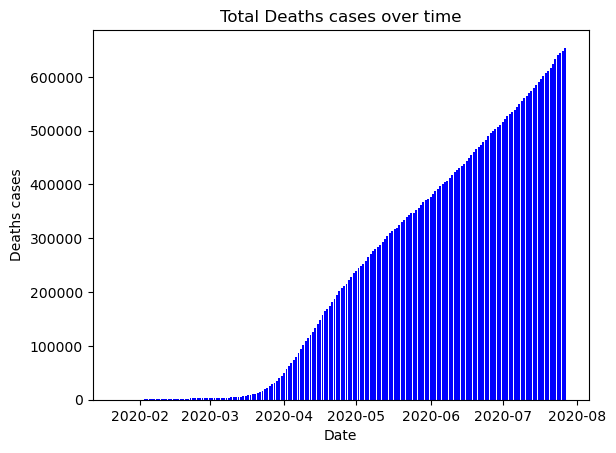

In [60]:
#plot date vs deaths cases using barplot 
plt.bar(t_cases_death['Date'],t_cases_death['Deaths'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Deaths cases')
plt.title('Total Deaths cases over time')
plt.show()

In [64]:
#top 20 countries with most cases
t_20 = gp.groupby('Country')['Active'].sum().reset_index().sort_values(by = 'Active', ascending = False).head(20)
t_20

Country     Active
173              US  156981121
23           Brazil   31094060
177  United Kingdom   22624595
138          Russia   19668578
79            India   15987913
61           France   10980287
157           Spain    9277432
32           Canada    8656985
132            Peru    7748957
85            Italy    7363518
128        Pakistan    5633262
154    South Africa    5150341
13       Bangladesh    4924394
120     Netherlands    4528235
161          Sweden    4524247
172          Turkey    4091900
37         Colombia    3832786
145    Saudi Arabia    3783704
16          Belgium    3689945
35            Chile    3320581

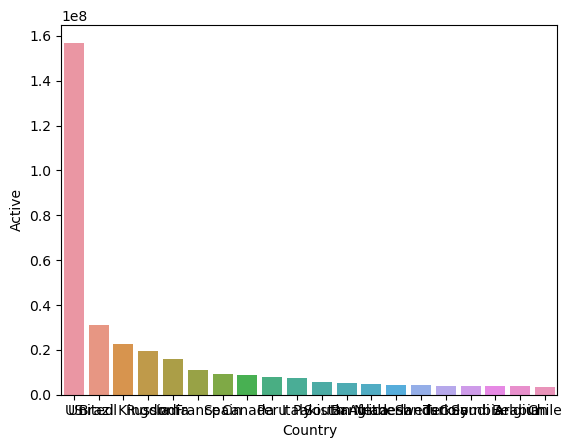

In [72]:
#bar plot --> seaborn
import seaborn as sns
sns.barplot(y = t_20.Active,x = t_20.Country)
plt.show()

In [ ]:
Facebook Prophet
--> an open sourve tool for forecasting the time series 

In [ ]:
t_cases #confirmed
t_cases_active #active
t_cases_death #death
t_cases_recovery #recovery

In [75]:
# pip install Prophet

  Obtaining dependency information for Prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/bd/77/3fa00dd747dfa9f1d89d53c60484eb3cbb5d32c94f57aecc64e0209e8e29/holidays-0.39-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f1

In [76]:
from prophet import Prophet

In [77]:
t_cases.head()

Date  Confirmed
0  2020-01-22        555
1  2020-01-23        654
2  2020-01-24        941
3  2020-01-25       1434
4  2020-01-26       2118

In [78]:
# t_cases --> comfirmed cases data
t_cases.columns = ['ds','y']
t_cases.head()

ds     y
0  2020-01-22   555
1  2020-01-23   654
2  2020-01-24   941
3  2020-01-25  1434
4  2020-01-26  2118

In [79]:
t_cases['ds'] = pd.to_datetime(t_cases['ds'])
t_cases

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [80]:
t_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [81]:
#create the model
model = Prophet()

In [82]:
model.fit(t_cases)

22:15:53 - cmdstanpy - INFO - Chain [1] start processing
22:15:54 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
future = model.make_future_dataframe(periods = 7, freq = 'D')
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [85]:
forecase = model.predict(future)
forecase

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.356186e+03 -1.212789e+05  9.010157e+04 -9.356186e+03   
1   2020-01-23 -6.667734e+03 -1.119913e+05  9.911955e+04 -6.667734e+03   
2   2020-01-24 -3.979282e+03 -9.648178e+04  1.054607e+05 -3.979282e+03   
3   2020-01-25 -1.290830e+03 -9.109249e+04  1.095747e+05 -1.290830e+03   
4   2020-01-26  1.397622e+03 -8.459052e+04  1.143739e+05  1.397622e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  1.674928e+07  1.664147e+07  1.685417e+07  1.674172e+07   
191 2020-07-31  1.695352e+07  1.684389e+07  1.706938e+07  1.693785e+07   
192 2020-08-01  1.715776e+07  1.706294e+07  1.728326e+07  1.713324e+07   
193 2020-08-02  1.736200e+07  1.724723e+07  1.747630e+07  1.732757e+07   
194 2020-08-03  1.756624e+07  1.744725e+07  1.768005e+07  1.752203e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.356186e+03   -10986.210444         -10986.210444         -10986.210444   
1   -6.667734e+03    -1078.891654          -1078.891654          -1078.891654   
2   -3.979282e+03    10103.249373          10103.249373          10103.249373   
3   -1.290830e+03    13670.214198          13670.214198          13670.214198   
4    1.397622e+03     7218.144397           7218.144397           7218.144397   
..            ...             ...                   ...                   ...   
190  1.675403e+07    -1078.891654          -1078.891654          -1078.891654   
191  1.696614e+07    10103.249373          10103.249373          10103.249373   
192  1.717875e+07    13670.214198          13670.214198          13670.214198   
193  1.739376e+07     7218.144397           7218.144397           7218.144397   
194  1.760774e+07    -2144.375427          -2144.375427          -2144.375427   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10986.210444 -10986.210444 -10986.210444                   0.0   
1    -1078.891654  -1078.891654  -1078.891654                   0.0   
2    10103.249373  10103.249373  10103.249373                   0.0   
3    13670.214198  13670.214198  13670.214198                   0.0   
4     7218.144397   7218.144397   7218.144397                   0.0   
..            ...           ...           ...                   ...   
190  -1078.891654  -1078.891654  -1078.891654                   0.0   
191  10103.249373  10103.249373  10103.249373                   0.0   
192  13670.214198  13670.214198  13670.214198                   0.0   
193   7218.144397   7218.144397   7218.144397                   0.0   
194  -2144.375427  -2144.375427  -2144.375427                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.034240e+04  
1                           0.0                         0.0 -7.746625e+03  
2                           0.0                         0.0  6.123967e+03  
3                           0.0                         0.0  1.237938e+04  
4                           0.0                         0.0  8.615766e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  1.674820e+07  
191                         0.0                         0.0  1.696362e+07  
192                         0.0                         0.0  1.717143e+07  
193                         0.0                         0.0  1.736922e+07  
194                         0.0                         0.0  1.756410e+07  

[195 rows x 16 columns]

In [86]:
forecase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    float64       
 3   yhat_upper                  195 non-null    float64       
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [87]:
forecase[['yhat','yhat_lower','yhat_upper']] = forecase[['yhat','yhat_lower','yhat_upper']].astype(int)

In [88]:
forecase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    int32         
 3   yhat_upper                  195 non-null    int32         
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [89]:
forecase[['ds','yhat','yhat_lower','yhat_upper']]

ds      yhat  yhat_lower  yhat_upper
0   2020-01-22    -20342     -121278       90101
1   2020-01-23     -7746     -111991       99119
2   2020-01-24      6123      -96481      105460
3   2020-01-25     12379      -91092      109574
4   2020-01-26      8615      -84590      114373
..         ...       ...         ...         ...
190 2020-07-30  16748198    16641467    16854167
191 2020-07-31  16963621    16843890    17069383
192 2020-08-01  17171429    17062935    17283256
193 2020-08-02  17369218    17247230    17476304
194 2020-08-03  17564097    17447247    17680048

[195 rows x 4 columns]

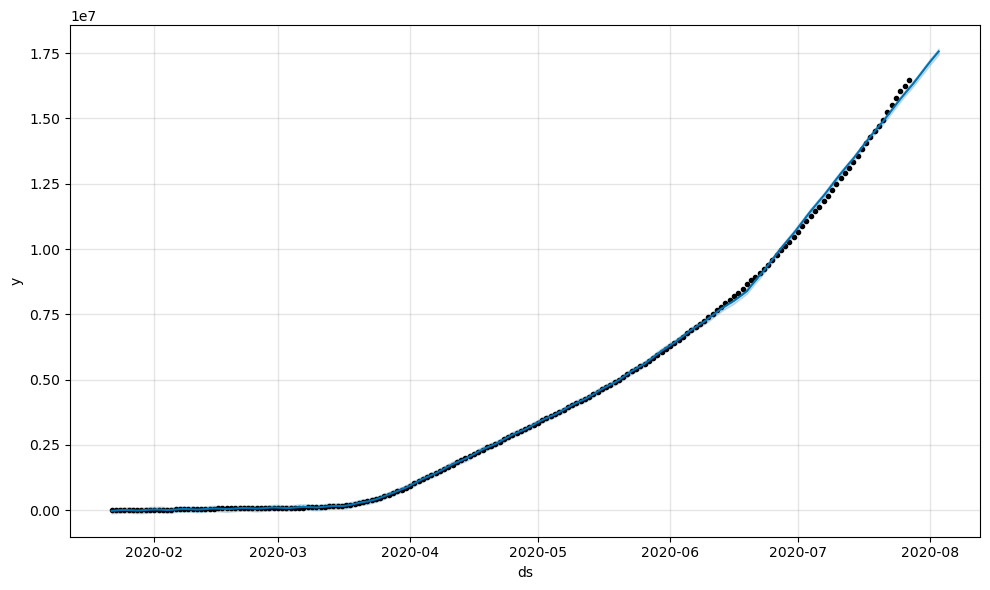

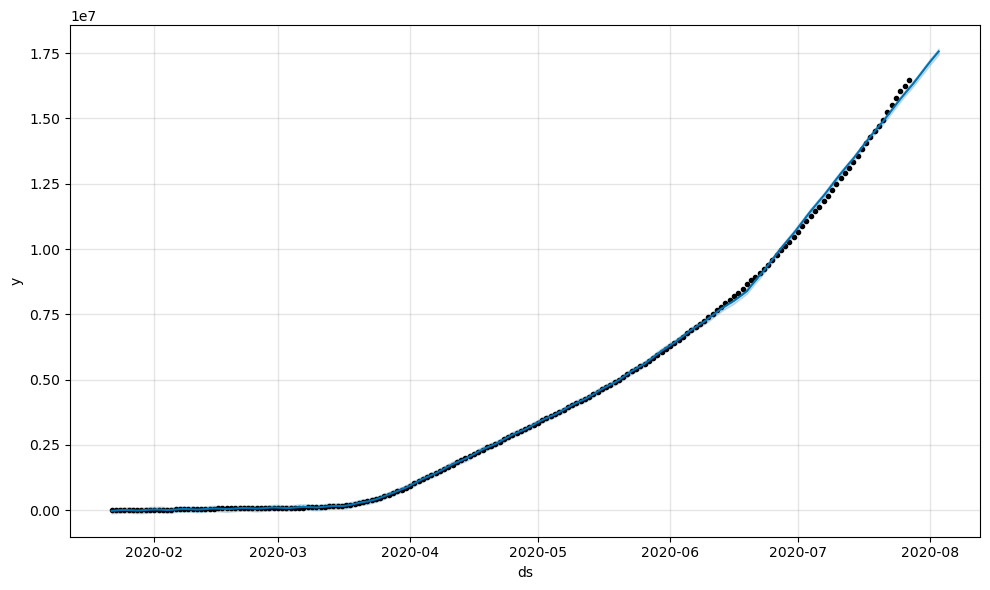

In [92]:
plot_time = model.plot(forecase)
plot_time

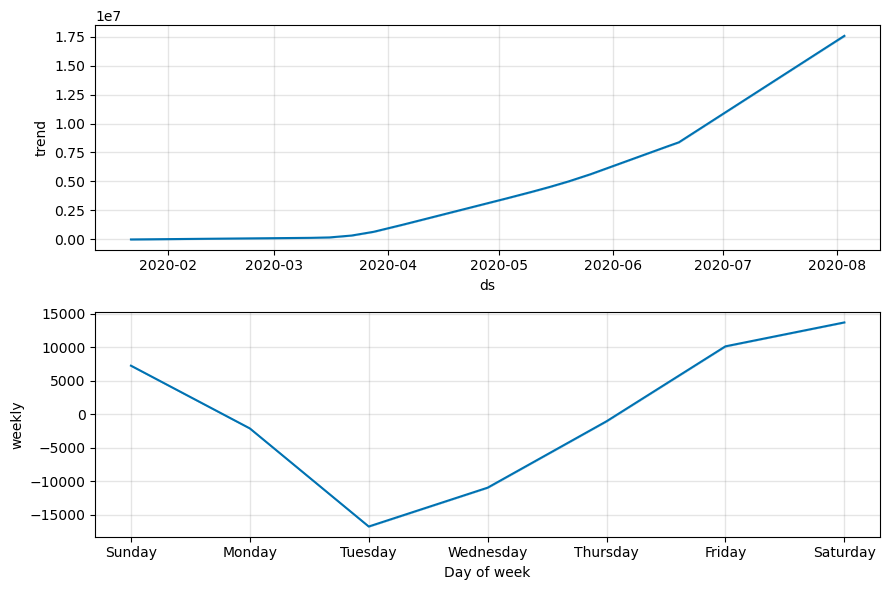

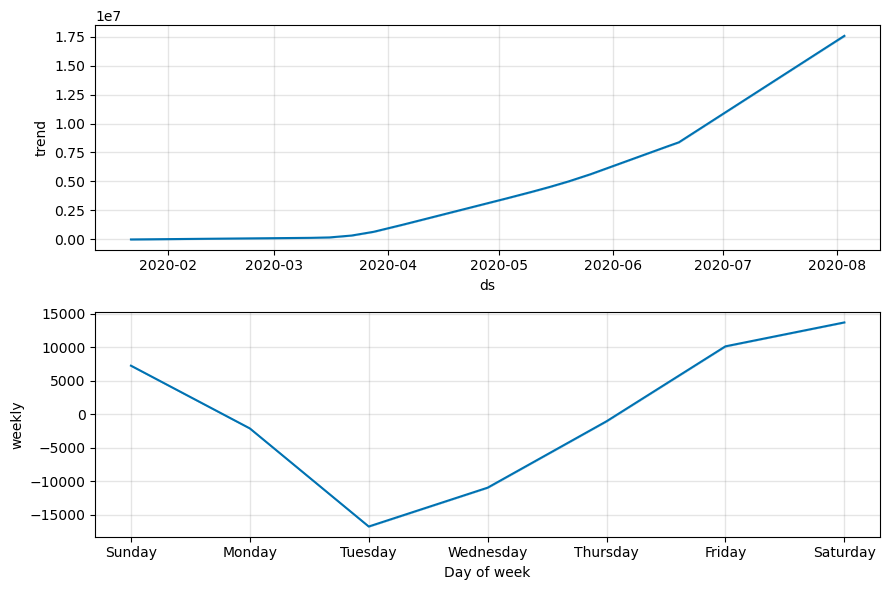

In [93]:
model.plot_components(forecase)